plots costs with F=400 frames

Discovers that logistic and saturating are a lot more robust than capped-linear

In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json

FILENAME = "series/series|F=400/data.json"

# data = pd.read_json("../data/series|KANAI_SUZUKI|LINEAR|2024-11-07T17-18-26.037.json")

# data["ratio"] = data["p"] / data["pR"]

In [7]:
with open("../data/" + FILENAME) as file:
    json_file = json.load(file)#, parse_float=lambda f: round(float(f), 2))
    data = pd.json_normalize(
        json_file,
        record_path=["snapshots"],
        meta=[
            ["settings", "maxCost"],
            ["settings", "patchImprovement"],
            ["settings", "patchRecovery"],
            ["settings", "recoveryLogic"],
        ],
    )

In [8]:
data["pI"] = data["settings.patchImprovement"]
data["pR"] = data["settings.patchRecovery"]
data["ratio"] = data["pI"] / data["pR"]


In [14]:
subset = data[(data["settings.maxCost"] == 2.0) & (data["settings.recoveryLogic"] == "LINEAR")]

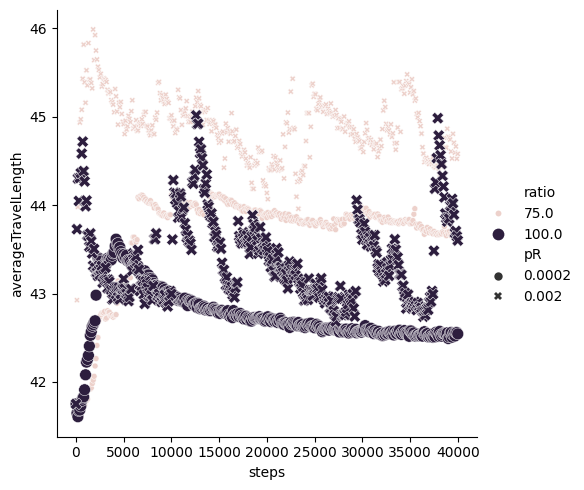

In [21]:
p = sns.relplot(
    data=subset,
    x="steps",
    y="averageTravelLength",
    size="ratio",
    style="pR",
    hue="ratio",
)

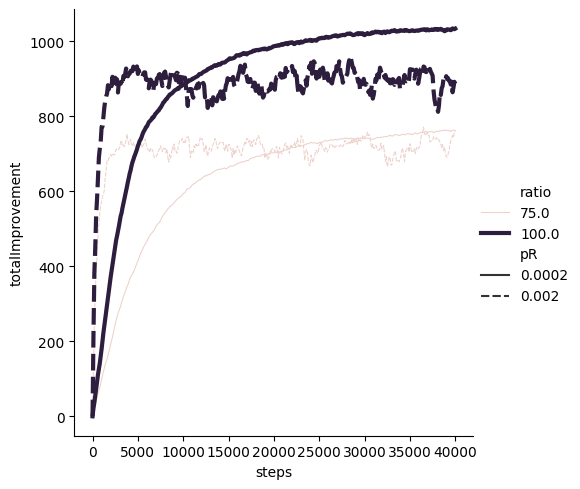

In [30]:
p = sns.relplot(
    data=subset,
    x="steps",
    y="totalImprovement",
    size="ratio",
    style="pR",
    hue="ratio",
    kind="line",
).savefig("improvement.png")

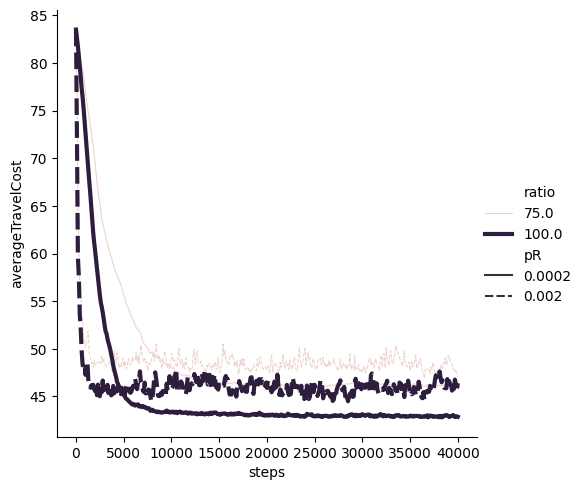

In [28]:
p = sns.relplot(
    data=subset,
    x="steps",
    y="averageTravelCost",
    size="ratio",
    style="pR",
    hue="ratio",
    kind="line",
).savefig("costs")

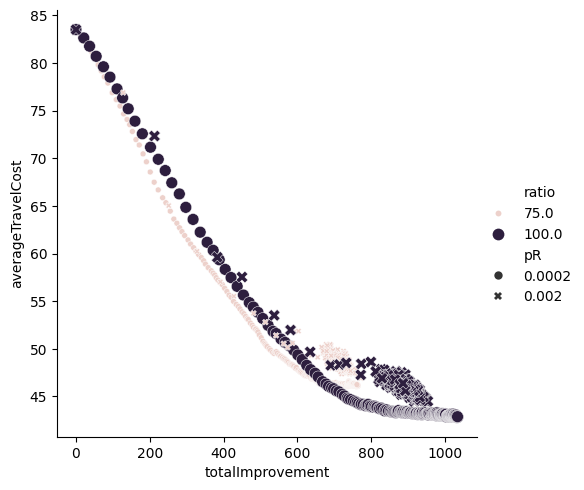

In [31]:
p = sns.relplot(
    data=subset,
    x="totalImprovement",
    y="averageTravelCost",
    size="ratio",
    style="pR",
    hue="ratio",
    kind="scatter",
)

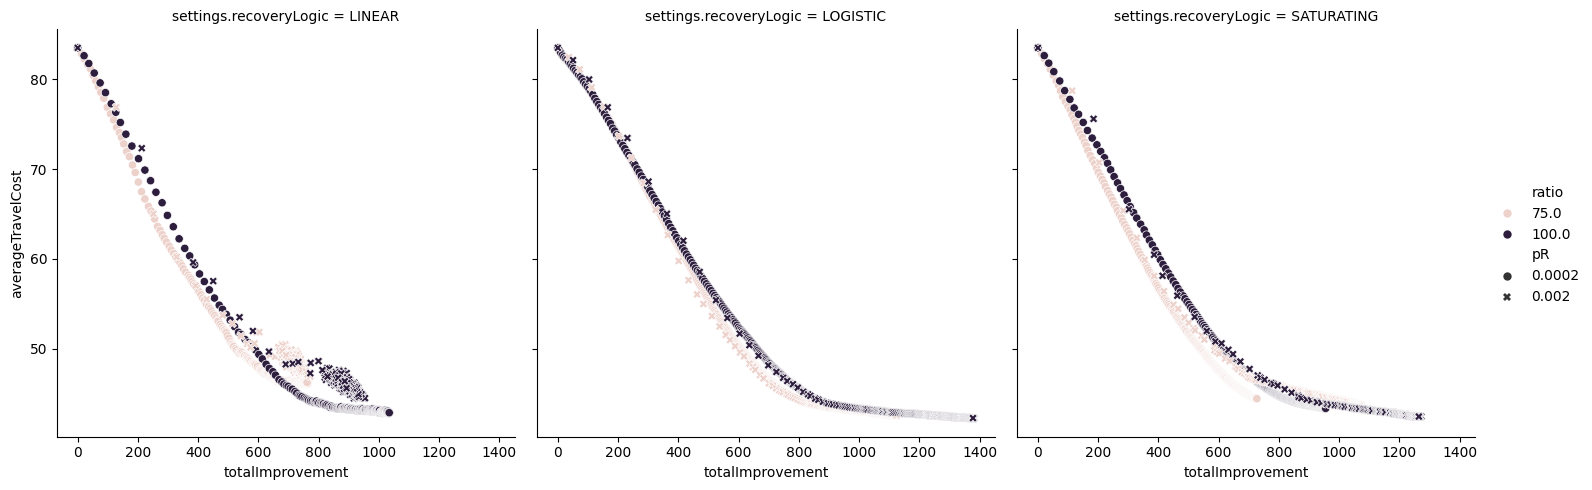

In [18]:
p = sns.relplot(
    data=data[data["settings.maxCost"]==2.0],
    x="totalImprovement",
    y="averageTravelCost",
    style="pR",
    hue="ratio",
    col="settings.recoveryLogic",
)

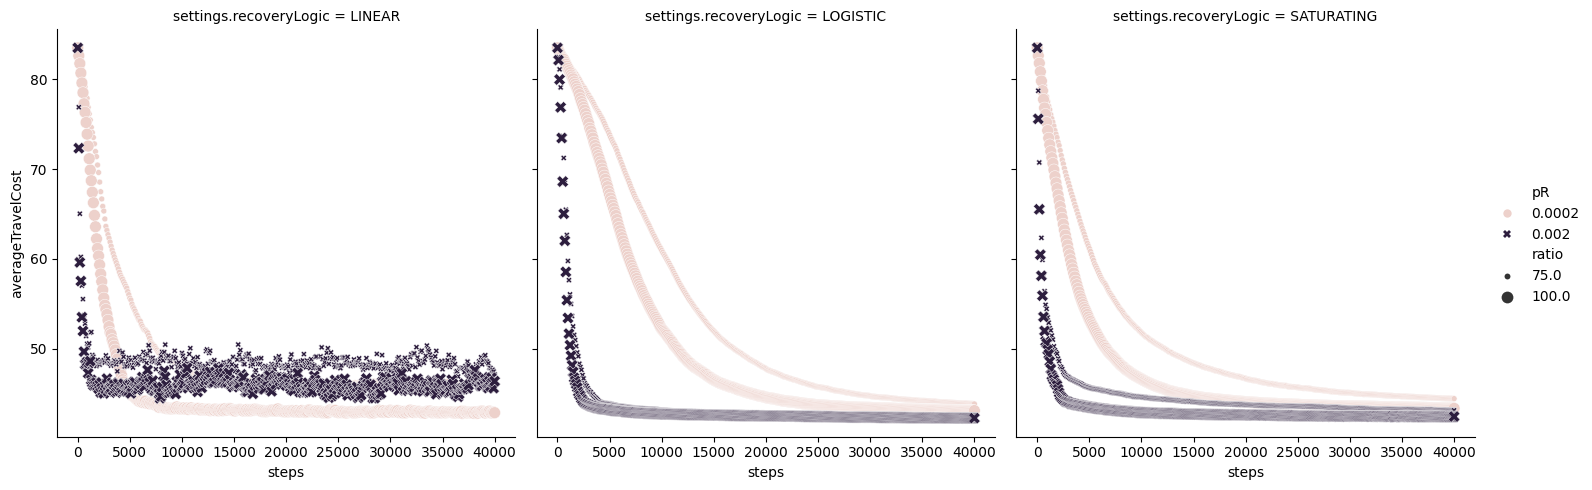

In [12]:
p = sns.relplot(
    data=data[data["settings.maxCost"]==2.0],
    x="steps",
    y="averageTravelCost",
    size="ratio",
    style="pR",
    hue="pR",
    col="settings.recoveryLogic",
)

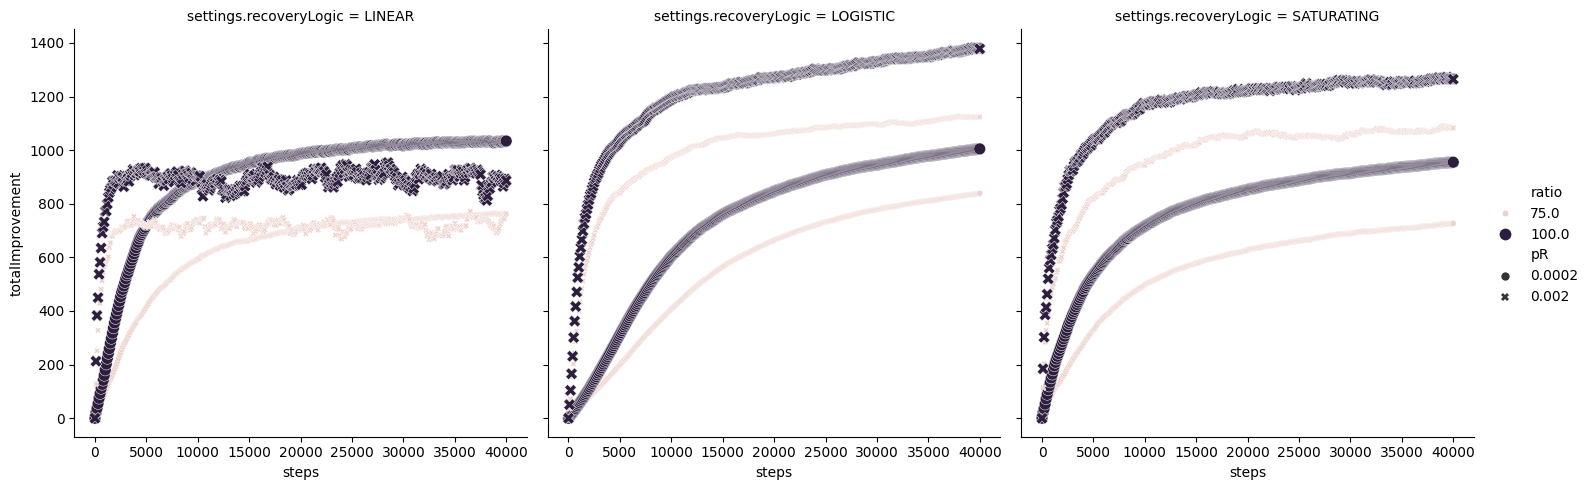

In [13]:
p = sns.relplot(
    data=data[data["settings.maxCost"]==2.0],
    x="steps",
    y="totalImprovement",
    size="ratio",
    style="pR",
    hue="ratio",
    col="settings.recoveryLogic",
)

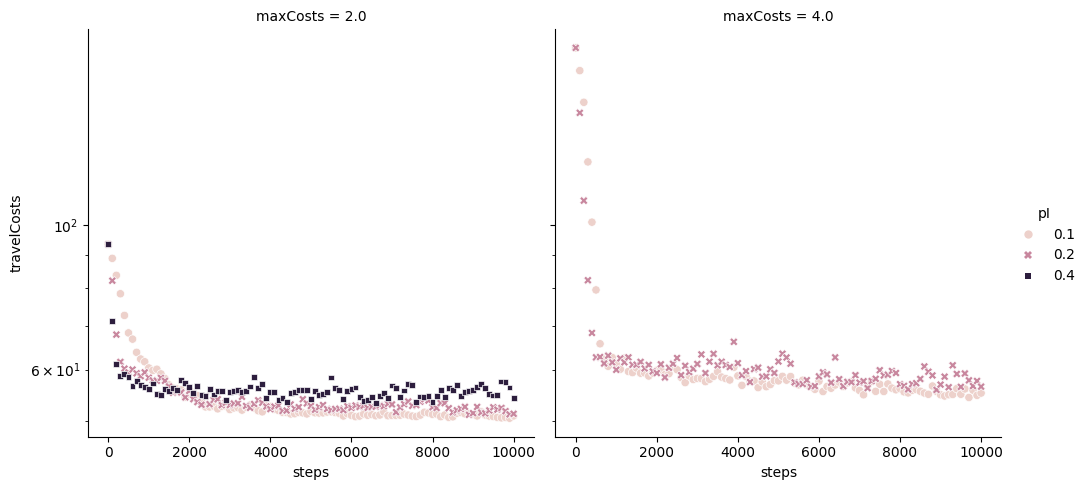

In [60]:
p = sns.relplot(
    data=data[data["ratio"] == 100],
    x="steps", y="travelCosts", style="pI", hue="pI", col="maxCosts"
)
plt.yscale('log')


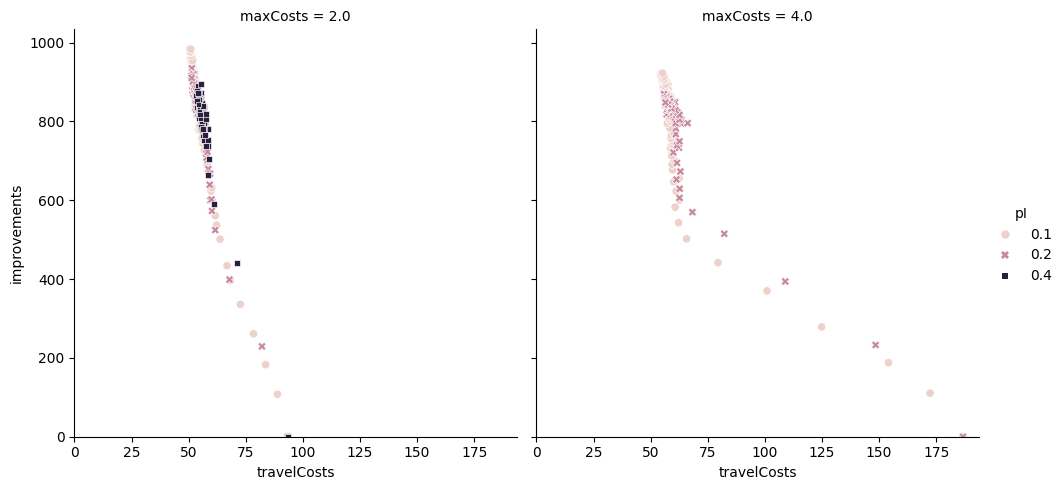

In [64]:
p = sns.relplot(data=data[data["ratio"]==100], x="travelCosts", y="improvements", style="pI", hue="pI", col="maxCosts")
p.set(xlim=(0, None), ylim=(0, None))

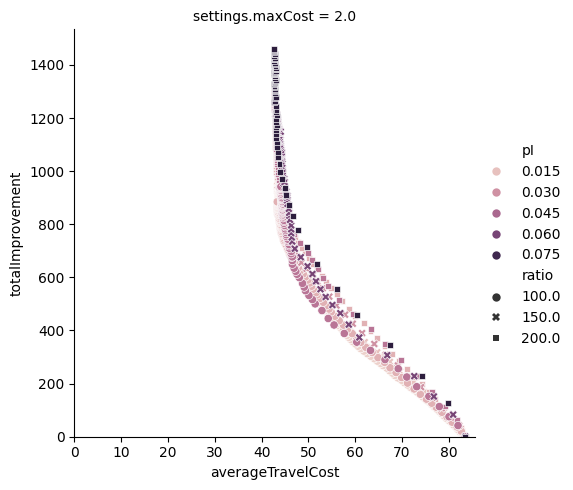

In [53]:
p = sns.relplot(data=data, x="averageTravelCost", y="totalImprovement", style="ratio", hue="pI", col="settings.maxCost")
p.set(ylim=(0, None), xlim=(0, None))

[(0.0, 1200.0), (0.0, 181.97337457520857)]

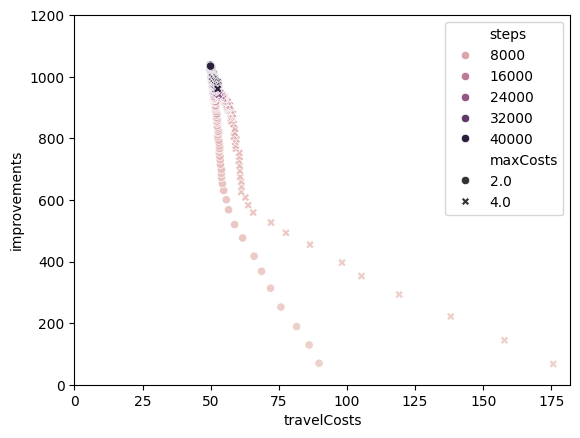

In [90]:
p = sns.scatterplot(
    data=data[(data["pI"]==0.04) & (data["pR"]==0.0004) & (data["steps"] > 0)],
    x="travelCosts", y="improvements", style="maxCosts", hue="steps")
p.set(ylim=(0, 1200), xlim=(0, None))


[(0.0, 1200.0), (0.0, 190.0)]

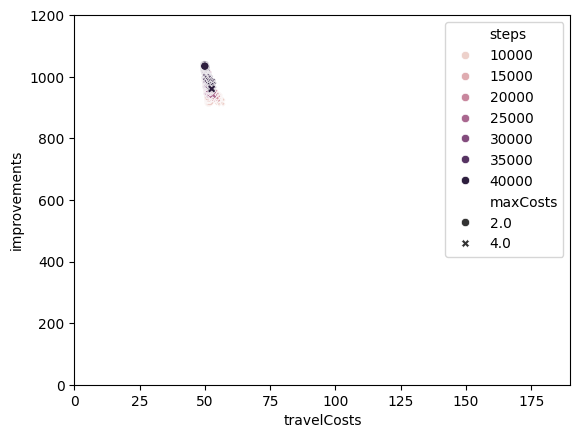

In [94]:
p = sns.scatterplot(
    data=data[(data["pI"]==0.04) & (data["pR"]==0.0004) & (data["steps"] >= 10000)],
    x="travelCosts", y="improvements", style="maxCosts", hue="steps")
p.set(ylim=(0, 1200), xlim=(0, 190))


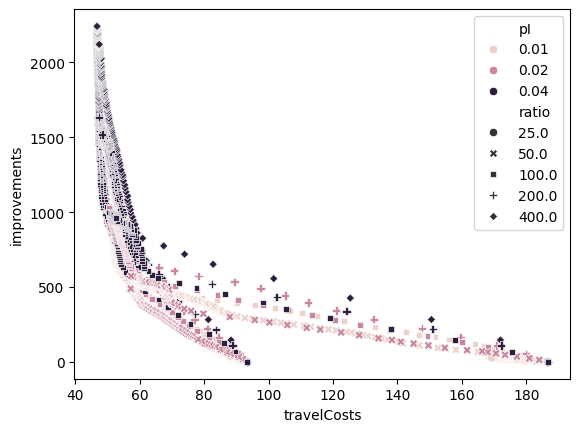

In [95]:
p = sns.scatterplot(data=data, x="travelCosts", y="improvements", style="ratio", hue="pI")

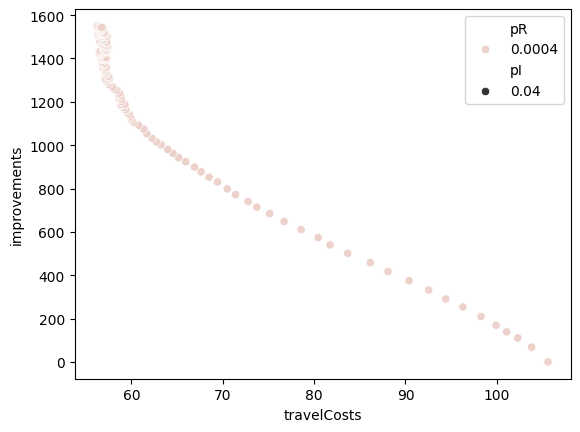

In [18]:
p = sns.scatterplot(data=data, x="travelCosts", y="improvements", hue="pR", style="pI")
# p.limit(x=(0, 120))